Data Visualization and Exploration
CPSC 5530
CRN 21428
Hunter Harris: zgt795
Assignment 3: Spatial Visualization 3

Import Libraries

In [218]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

Load Data

In [219]:
# Load .nii image
brain_image = nib.load("BraTS20_Training_004_flair.nii")

Inspect Data

In [220]:
# This displays the data structure of the nibabel image
print(brain_image)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (240, 240, 155)
affine: 
[[ -1.  -0.  -0.   0.]
 [ -0.  -1.  -0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b   

Visualize Data

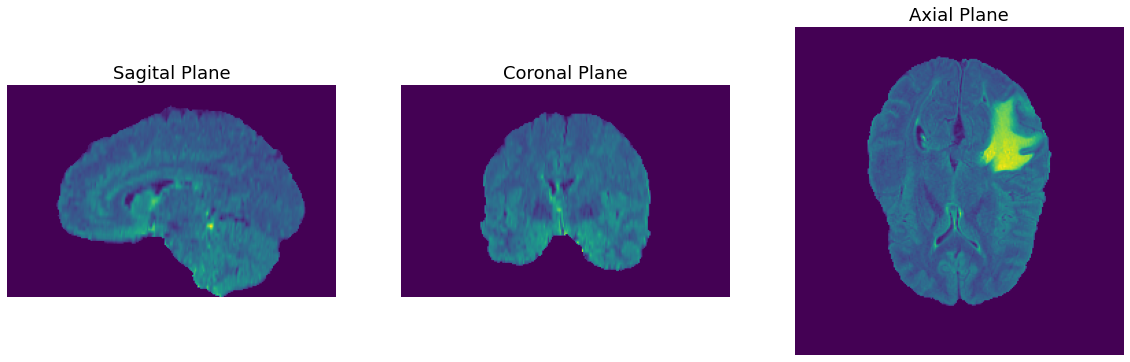

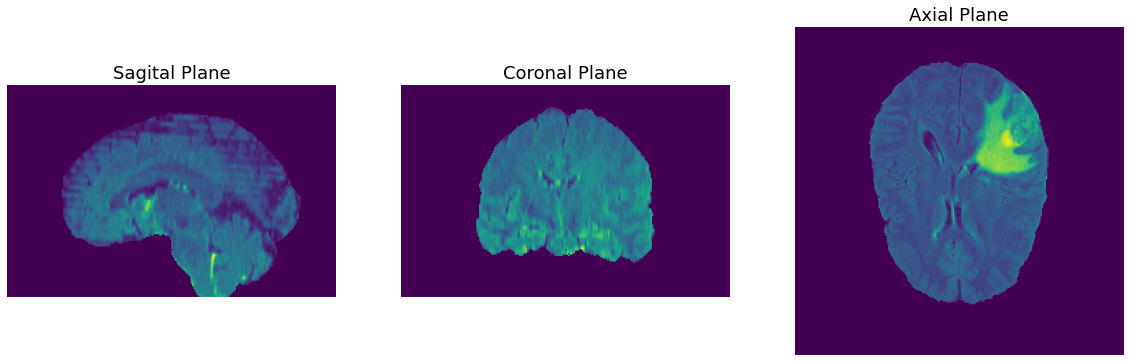

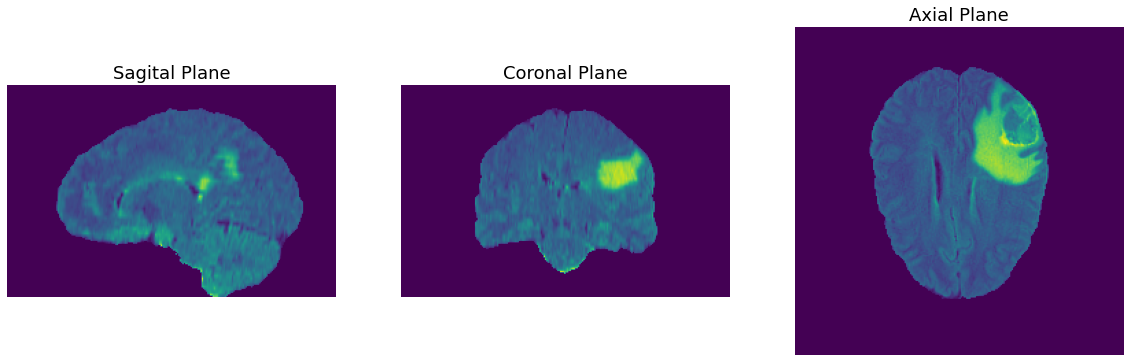

In [221]:
# Function to create 3 images based on axis slice
def brain_imaging(file_name, index_offset, image_data):

    # Extract the image data from the data structure
    image = image_data.get_fdata()

    # Select the middle slices for each axis
    i, j, k = np.array(image.shape) // 2

    # Specify image based on plane and slice
    sagital_image = image[i+index_offset,:,:]
    coronal_image = image[:,j+index_offset,:]
    axial_image = image[:,:,k+index_offset]

    # Create initial plot
    fig = plt.figure(figsize=(20,10))

    # Plot the sagital image
    ax1 = fig.add_subplot(1,3,1)
    ax1.imshow(np.rot90(sagital_image))
    ax1.set_title('Sagital Plane', size=18)
    ax1.axis("off")

    # Plot coronal image
    ax1 = fig.add_subplot(1,3,2)
    ax1.imshow(np.rot90(coronal_image))
    ax1.set_title('Coronal Plane', size=18)
    ax1.axis("off")

    # Plot the axial image
    ax1 = fig.add_subplot(1,3,3)
    ax1.imshow(np.rot90(axial_image))
    ax1.set_title('Axial Plane', size=18)
    ax1.axis("off")

    # Save Figure
    fig.savefig(file_name, dpi=1200, bbox_inches = 'tight')

# Create first Brain Image
brain_imaging("Brain_Glioma_2", -10, brain_image)

# Create second Brain Image
brain_imaging("Brain_Glioma_1", 0, brain_image)

# Create third Brain Image
brain_imaging("Brain_Glioma_3", 10, brain_image)